<a href="https://colab.research.google.com/github/dnlgnwn-wq/IRIS/blob/main/BungaIrisdnl_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==============================
# IMPORT LIBRARY
# ==============================
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
# ==============================
# LOAD DATASET IRIS
# ==============================
file_path = "/content/iris.csv"
data = pd.read_csv(file_path)

print("=== DATASET IRIS ===")
display(data.head())

=== DATASET IRIS ===


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# ==============================
# KELOMPOK DATA BERDASARKAN SPESIES
# ==============================
setosa = data[data['species'] == 'setosa']
versicolor = data[data['species'] == 'versicolor']
virginica = data[data['species'] == 'virginica']

print("Jumlah data per spesies:")
print("Setosa     :", len(setosa))
print("Versicolor :", len(versicolor))
print("Virginica  :", len(virginica))

Jumlah data per spesies:
Setosa     : 50
Versicolor : 50
Virginica  : 50


In [4]:
# ==============================
# MENENTUKAN FITUR DAN LABEL
# ==============================
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [5]:
# ==============================
# LABEL ENCODING
# ==============================
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nLabel Mapping:")
for i, label in enumerate(le.classes_):
    print(i, "=", label)


Label Mapping:
0 = setosa
1 = versicolor
2 = virginica


In [6]:
# ==============================
# NORMALISASI DATA
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# ==============================
# SPLIT DATA TRAIN & TEST
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("\nData train:", X_train.shape)
print("Data test :", X_test.shape)


Data train: (120, 4)
Data test : (30, 4)


In [10]:
# ==============================
# TRAINING MODEL DECISION TREE
# ==============================
model = DecisionTreeClassifier(
    criterion='gini',   # bisa diganti 'entropy'
    max_depth=5,
    random_state=42
)

print("\n=== Training Model Decision Tree ===")
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

print(f"Training selesai dalam {end_time - start_time:.6f} detik")


=== Training Model Decision Tree ===
Training selesai dalam 0.004401 detik


In [11]:
# ==============================
# EVALUASI MODEL
# ==============================
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

print("\n=== HASIL EVALUASI ===")
print(f"Akurasi : {acc * 100:.2f}%")
print(f"AUC     : {auc:.4f}\n")

print("Classification Report:")
print(classification_report(
    y_test,
    y_pred,
    target_names=le.classes_,
    digits=4
))


=== HASIL EVALUASI ===
Akurasi : 90.00%
AUC     : 0.9250

Classification Report:
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     0.8182    0.9000    0.8571        10
   virginica     0.8889    0.8000    0.8421        10

    accuracy                         0.9000        30
   macro avg     0.9024    0.9000    0.8997        30
weighted avg     0.9024    0.9000    0.8997        30



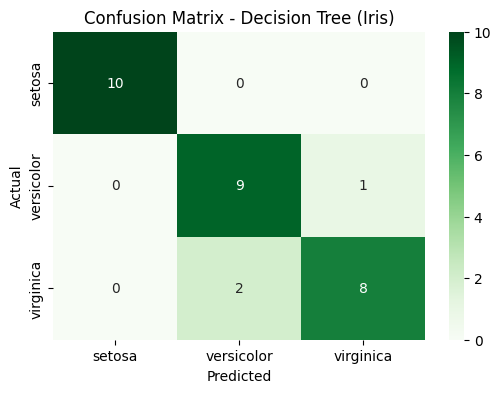

In [16]:
# ==============================
# PREDIKSI MANUAL DARI USER
# ==============================
print("\n=== Prediksi Manual Iris ===")
print("=== UKURAN DALAM CENTIMETER (CM) ===")

sepal_length = float(input("Masukkan sepal length: "))
sepal_width  = float(input("Masukkan sepal width : "))
petal_length = float(input("Masukkan petal length: "))
petal_width  = float(input("Masukkan petal width : "))

# Normalisasi input user
input_scaled = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])

# Prediksi
pred = model.predict(input_scaled)
pred_label = le.inverse_transform(pred)

print(f"\nJenis Bunga Iris: {pred_label[0]}")


=== Prediksi Manual Iris ===
=== UKURAN DALAM CENTIMETER (CM) ===
Masukkan sepal length: 1
Masukkan sepal width : 2
Masukkan petal length: 3
Masukkan petal width : 4

Jenis Bunga Iris: virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


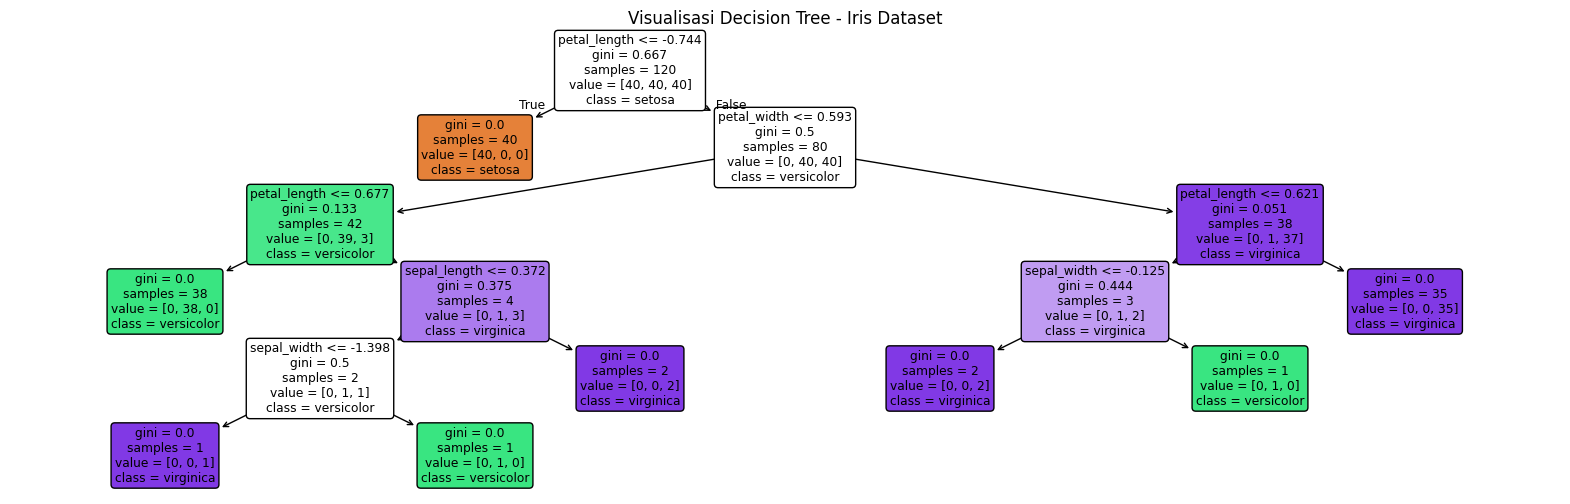

In [23]:
# ==============================
# VISUALISASI DECISION TREE
# ==============================
plt.figure(figsize=(20,6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True
)
plt.title("Visualisasi Decision Tree - Iris Dataset")
plt.show()